# Linear Regression

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Data Import
df = pd.read_csv(join('data','iris.csv'))
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
## Remove columns we do not use in this example
del df['Id']
del df['Species']
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
## Some functions to explore data
print(df.corr())
print(df.dtypes)
print(df.shape)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object
(150, 4)


In [7]:
## Train-Valiedation Spli
## Index control by yourself
n_data = df.shape[0]
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print(n_data, n_trn, n_tst)

idx_data = pd.Series(range(0,150))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print(len(idx_trn),len(idx_tst))

150 105 45
[ 64  66  22  41 117  18 138 124  95   4 100  47  63 115  42 114  11  89
 125   0 105  39  72 126 119  20  55 136  12 101  51 135  97  23   7  96
 144  62 109  32  87   2 107  27   8  38   5  44  76 118  78  93 104  82
  83 130  10 148  99 149  58  52 103  48  88  40  65 131  77   9 127 116
   6 141 133  50  73 110  92  84 146  56  59  74  24  49  34 113  68  90
 134  13  61 145 112 123 147  43  19  36 143  86  46  91  15  98  57  75
  54  69  35 120  80  31  25  37 102  33  53  71  28   3 122   1 111 108
 129  45  67 128  26 137  85 139  81 140  29 142  16  30 121  70  94  79
  60  14  17  21 132 106]
105 45


In [8]:
trnx = df.iloc[idx_trn,0:3]
trny = df.iloc[idx_trn,3]
tstx = df.iloc[idx_tst,0:3]
tsty = df.iloc[idx_tst,3]

In [9]:
## Or you can use just this !!
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(df.iloc[:,0:3], df.iloc[:,3], test_size=0.3, random_state=123)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
print(lr_pred)

[1.55082809 1.88707017 1.99246785 1.43328554 0.21474604 1.71295854
 1.22046352 0.26422937 0.2364671  1.514382   1.66814449 0.30495491
 1.3459842  1.96624119 1.97975798 2.13134163 0.05673136 0.12535558
 1.60393614 0.15850432 0.16333728 1.74369079 0.54406604 1.74160168
 0.41018891 0.27565704 0.16559008 1.81835622 2.53074751 0.27131513
 2.00373184 1.60223684 0.35015878 0.2173262  1.05190204 0.95816968
 2.31286639 0.41364995 0.19351603 1.18764216 0.98544089 0.05085384
 2.16240125 1.74836007 1.84804391]


In [10]:
## Calculation of RMSE
np.sqrt(np.mean((np.square(lr_pred - tsty))))

0.20240684385048965

[83.50861963]


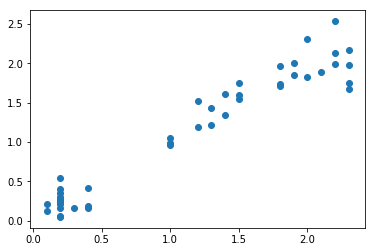

In [11]:
plt.scatter(x=tsty, y=lr_pred)
print(np.correlate(tsty, lr_pred))

In [12]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred, tsty)))
print('R2:', metrics.r2_score(tsty, lr_pred))

RMSE: 0.20240684385048965
R2: 0.9372028808296337


In [12]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso, tsty)))

from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge, tsty)))

print(model.coef_, model_lasso.coef_, model_ridge.coef_)

NameError: name 'metrics' is not defined

[65.89187782]


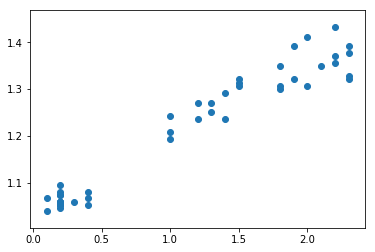

In [13]:
plt.scatter(x=tsty, y=lr_pred_lasso)
print(np.correlate(tsty, lr_pred_lasso))

In [16]:
from sklearn.feature_selection import RFE
selector = RFE(model)
selector = selector.fit(X=trnx, y=trny)
print(selector.support_ )
print(selector.ranking_)

[False False  True]
[3 2 1]
